#### Libraries Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

## **EXPLORATORY DATA ANALYSIS**

In [3]:
## READING IN THE DATASET

df = pd.read_csv("../DATA/wine_fraud.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
##UNIQUE VALUES OF TARGET VARIABLE

df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

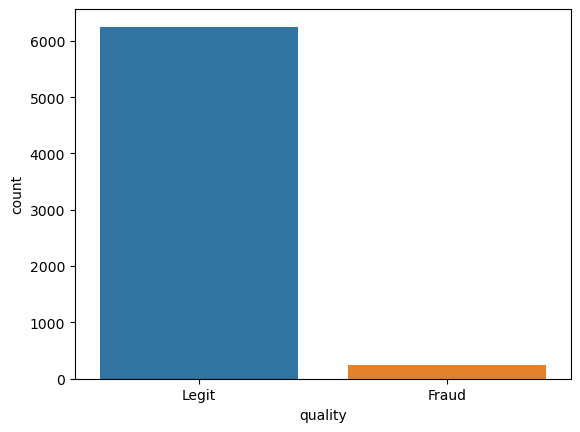

In [6]:
## COUNTPLOT OF THE TWO VALUES

sns.countplot(data=df, x='quality')

<Axes: xlabel='type', ylabel='count'>

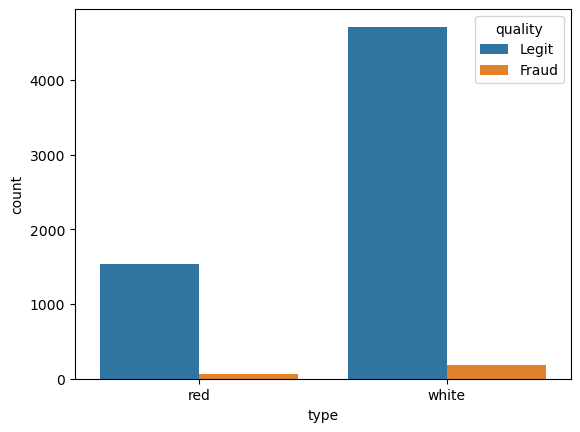

In [8]:
sns.countplot(data=df, hue='quality', x='type')

In [19]:
## PERCENTAGE OF FRAUD IN RED WINES

red_wines = df[df['type']=='red']
frauded_red_wines = red_wines[red_wines['quality']=='Fraud']

percent_fraud_red = (len(frauded_red_wines)/len(red_wines))*100
print(percent_fraud_red)

3.9399624765478425


In [21]:
## PERCENTAGE OF FRAUD IN WHITE WINES

white_wines = df[df['type']=='white']
frauded_white_wines = white_wines[white_wines['quality']=='Fraud']

percent_fraud_white = (len(frauded_white_wines)/len(white_wines))*100
print(percent_fraud_white)

3.7362188648427925


In [27]:
## MAPPING THE QUALITY 

df['fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [32]:
## CALCULATION OF CORRELATION

corr_data = df.corr(numeric_only=True)
fraud_corrs = corr_data['fraud']
fraud_corrs

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
fraud                   1.000000
Name: fraud, dtype: float64

<Axes: >

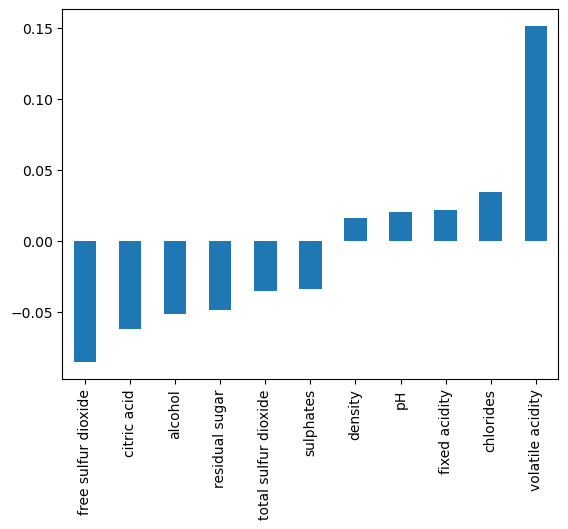

In [35]:
## BAR PLOT - CORRELATION VALUES TO FRAUDLENT WINE 

df.corr(numeric_only=True)['fraud'][:-1].sort_values().plot(kind='bar')
            

In [2]:
sns.clustermap(corr_data)

NameError: name 'sns' is not defined

## **MACHINE LEARNING**

In [38]:
## DUMMY VARIABLES

df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [47]:
## SEPARATION INTO FEATURES AND TARGET LABEL

X = df.drop('quality',axis=1)
y = df['quality']

In [48]:
## TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.1)

In [49]:
## SCALING THE X TRAIN AND X TEST DATA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [86]:
## SVC MODEL

from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

In [85]:
## GRID SEARCH CV

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
              'gamma': ['scale', 'auto']}

cv_model = GridSearchCV(svc, param_grid)

In [87]:
# MODEL FITTING

cv_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [88]:
## BEST PARAMETERS

cv_model.best_params_

{'C': 1, 'gamma': 'auto'}

In [90]:
## PREDICTIONS

y_preds = cv_model.predict(scaled_X_test)

In [95]:
## CONFUSION MATRIX
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_preds)
cm

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [96]:
## CLASSIFICATION REPORT

from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

